In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [2]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns

In [3]:
glob.glob(r"C:\Users\DELL\Downloads\fiverr work\archive (1)\train\*")

['C:\\Users\\DELL\\Downloads\\fiverr work\\archive (1)\\train\\cardboard',
 'C:\\Users\\DELL\\Downloads\\fiverr work\\archive (1)\\train\\glass',
 'C:\\Users\\DELL\\Downloads\\fiverr work\\archive (1)\\train\\metal',
 'C:\\Users\\DELL\\Downloads\\fiverr work\\archive (1)\\train\\paper',
 'C:\\Users\\DELL\\Downloads\\fiverr work\\archive (1)\\train\\plastic',
 'C:\\Users\\DELL\\Downloads\\fiverr work\\archive (1)\\train\\trash']

In [4]:
#define an image size of 128 by 128
SIZE = 128

train_images = []
train_labels = []

#populate the image and labels to an empty list
for directory_path in glob.glob(r"C:\Users\DELL\Downloads\fiverr work\archive (1)\train\*"):
    label = directory_path.split('\\')[-1]
    print(directory_path)
    print('================')
    print(label)

    for img_path in glob.glob(os.path.join(directory_path, '*.jpg')):
#         print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)

#convert list to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

C:\Users\DELL\Downloads\fiverr work\archive (1)\train\cardboard
cardboard
C:\Users\DELL\Downloads\fiverr work\archive (1)\train\glass
glass
C:\Users\DELL\Downloads\fiverr work\archive (1)\train\metal
metal
C:\Users\DELL\Downloads\fiverr work\archive (1)\train\paper
paper
C:\Users\DELL\Downloads\fiverr work\archive (1)\train\plastic
plastic
C:\Users\DELL\Downloads\fiverr work\archive (1)\train\trash
trash


In [5]:
#perform the same procedure for the test dataset
test_images = []
test_labels = []

for directory_path in glob.glob(r"C:\Users\DELL\Downloads\fiverr work\archive (1)\test\*"):
    label = directory_path.split('\\')[-1]
    print(directory_path)
    print('================')
    print(label)

    for img_path in glob.glob(os.path.join(directory_path, '*.jpg')):
#         print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

C:\Users\DELL\Downloads\fiverr work\archive (1)\test\cardboard
cardboard
C:\Users\DELL\Downloads\fiverr work\archive (1)\test\glass
glass
C:\Users\DELL\Downloads\fiverr work\archive (1)\test\metal
metal
C:\Users\DELL\Downloads\fiverr work\archive (1)\test\paper
paper
C:\Users\DELL\Downloads\fiverr work\archive (1)\test\plastic
plastic
C:\Users\DELL\Downloads\fiverr work\archive (1)\test\trash
trash


In [6]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical 

#convert to numbers
encoder = LabelEncoder()
encoder.fit(train_labels)
train_labels_encoded = encoder.transform(train_labels)

encoder.fit(test_labels)
test_labels_encoded = encoder.transform(test_labels)

In [7]:
#rename data for easy indentification
X_train, y_train, X_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [8]:
#normalize the image pixels
X_train, X_test = X_train/255.0, X_test/255.0

In [9]:
#one hot encode the labels
train_labels_onehot = to_categorical(train_labels_encoded)

test_labels_onehot = to_categorical(test_labels_encoded)

In [10]:
#build the neural network for feature extractor
feature_extractor = Sequential()

feature_extractor.add(Conv2D(64, (3, 3), input_shape=(SIZE, SIZE, 3), activation='relu'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D((2, 2)))

feature_extractor.add(Conv2D(64, (3, 3), activation='relu'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D((2, 2)))

feature_extractor.add(Conv2D(32, (3, 3), activation='sigmoid'))
feature_extractor.add(Dropout(0.2))

feature_extractor.add(Conv2D(32, (3, 3), activation='sigmoid'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D((2, 2)))

feature_extractor.add(Flatten())

In [11]:

fe_output = feature_extractor.output
hidden_1 = Dense(128, activation='sigmoid', kernel_initializer='he_uniform')(fe_output)
hidden_2 = Dropout(0.2)(hidden_1)
output = Dense(6, activation='softmax')(hidden_2)

In [12]:
#complie the network
cnn_model = Model(inputs=feature_extractor.input, outputs=output)

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0     

In [13]:
#train the model
history = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
56/56 [==============================] - 134s 2s/step - loss: 1.8159 - accuracy: 0.3501 - val_loss: 1.8336 - val_accuracy: 0.1717
Epoch 2/20
56/56 [==============================] - 134s 2s/step - loss: 1.2117 - accuracy: 0.5191 - val_loss: 1.9786 - val_accuracy: 0.1717
Epoch 3/20
56/56 [==============================] - 135s 2s/step - loss: 1.0777 - accuracy: 0.5924 - val_loss: 2.2685 - val_accuracy: 0.1717
Epoch 4/20
56/56 [==============================] - 134s 2s/step - loss: 0.9779 - accuracy: 0.6416 - val_loss: 2.1594 - val_accuracy: 0.2065
Epoch 5/20
56/56 [==============================] - 134s 2s/step - loss: 0.9430 - accuracy: 0.6814 - val_loss: 2.4245 - val_accuracy: 0.1787
Epoch 6/20
56/56 [==============================] - 134s 2s/step - loss: 0.8549 - accuracy: 0.6968 - val_loss: 2.3294 - val_accuracy: 0.2877
Epoch 7/20
56/56 [==============================] - 133s 2s/step - loss: 0.8322 - accuracy: 0.6996 - val_loss: 2.0401 - val_accuracy: 0.3387
Epoch 8/20
56

Text(0.5, 1.0, 'Learning plot')

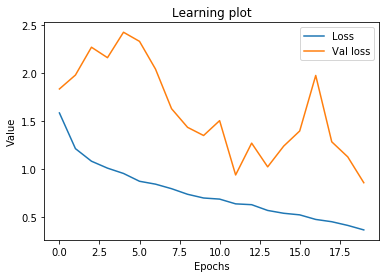

In [14]:
#plot the training process
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val loss')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.title('Learning plot')

In [15]:
#make the prediction
nn_prediction = cnn_model.predict(X_test)

In [16]:
nn_prediction = np.argmax(nn_prediction, axis=-1)
nn_prediction = encoder.inverse_transform(nn_prediction)
# nn_prediction

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, nn_prediction)

0.6844547563805105

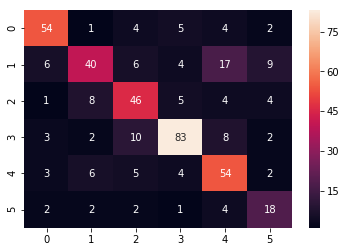

In [17]:
from sklearn.metrics import confusion_matrix

#plot a confusion matrix
cm = confusion_matrix(test_labels, nn_prediction)
sns.heatmap(cm, annot=True)

#Using a Random Forest Classifier on top of the Neural Network

In [18]:
#use features for nn to rf
#this is input to rf
x_for_rf = feature_extractor.predict(X_train)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=30, random_state=42)

In [20]:
#train the model
rf_model.fit(x_for_rf, y_train)

RandomForestClassifier(n_estimators=30, random_state=42)

In [21]:
#send test data through same feature extractor process
X_test_features = feature_extractor.predict(X_test)

In [22]:
#make a prediction
rf_prediction = rf_model.predict(X_test_features)

In [23]:
rf_prediction = encoder.inverse_transform(rf_prediction)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, rf_prediction)

0.7099767981438515

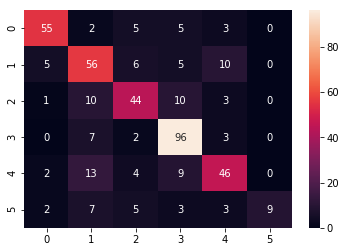

In [25]:
cm = confusion_matrix(test_labels, rf_prediction)
sns.heatmap(cm, annot=True)

In [35]:
from sklearn.svm import SVC
data_for_csv = feature_extractor.predict(X_train)

svc_model = SVC()
svc_model.fit(data_for_csv, y_train)

svc_prediction = feature_extractor.predict(X_test)
svc_prediction = svc_model.predict(svc_prediction)

svc_prediction = encoder.inverse_transform(svc_prediction)
print(confusion_matrix(test_labels, svc_prediction))

print(accuracy_score(test_labels, svc_prediction))
# svc_prediction

[[55  3  4  5  3  0]
 [ 1 59  5  2 14  1]
 [ 1  6 48  8  4  1]
 [ 0  3  3 94  7  1]
 [ 3  6  4  5 56  0]
 [ 1  6  2  1  4 15]]
0.7587006960556845


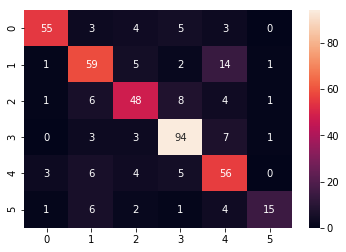

In [36]:
sns.heatmap(confusion_matrix(test_labels, svc_prediction), annot=True)

The actual image is  plastic
The RF predicted image is  ['paper']
The NN predicted image is  cardboard
The SVC predicted image is  ['plastic']


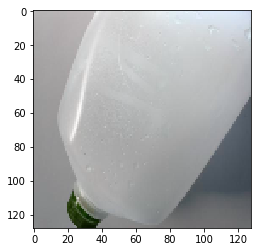

In [48]:
#test the prediction of both approaches
n = np.random.choice(list(range(len(X_test))))
img = X_test[n]
plt.imshow(img)

input_img = np.expand_dims(img, axis=0)
input_img_features = feature_extractor.predict(input_img)
pred_rf = rf_model.predict(input_img_features)
pred_nn = cnn_model.predict(input_img)
pred_nn = np.argmax(pred_nn, axis=0)
pred_svc = svc_model.predict(input_img_features)

# print(pred)
pred_rf = encoder.inverse_transform(pred_rf)
pred_nn = encoder.inverse_transform(pred_nn)
pred_svc = encoder.inverse_transform(pred_svc)


print('The actual image is ', test_labels[n])
print('The RF predicted image is ', pred_rf)
print('The NN predicted image is ', pred_nn[0])
print('The SVC predicted image is ', pred_svc)